<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Classification" data-toc-modified-id="Classification-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Classification</a></span><ul class="toc-item"><li><span><a href="#Supervised-learning" data-toc-modified-id="Supervised-learning-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Supervised learning</a></span><ul class="toc-item"><li><span><a href="#Unsupervised-learning:-Uses-unlabeled-data" data-toc-modified-id="Unsupervised-learning:-Uses-unlabeled-data-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Unsupervised learning: Uses unlabeled data</a></span></li><li><span><a href="#Reinforcement-learning" data-toc-modified-id="Reinforcement-learning-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Reinforcement learning</a></span></li><li><span><a href="#Supervised-learning" data-toc-modified-id="Supervised-learning-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Supervised learning</a></span></li><li><span><a href="#Naming-conventions" data-toc-modified-id="Naming-conventions-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Naming conventions</a></span></li><li><span><a href="#Supervised-learning-in-Python" data-toc-modified-id="Supervised-learning-in-Python-1.1.5"><span class="toc-item-num">1.1.5&nbsp;&nbsp;</span>Supervised learning in Python</a></span></li></ul></li><li><span><a href="#Exploratory-data-analysis" data-toc-modified-id="Exploratory-data-analysis-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Exploratory data analysis</a></span><ul class="toc-item"><li><span><a href="#The-Iris-dataset" data-toc-modified-id="The-Iris-dataset-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>The Iris dataset</a></span></li><li><span><a href="#The-Iris-dataset-in-scikit-learn" data-toc-modified-id="The-Iris-dataset-in-scikit-learn-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>The Iris dataset in scikit-learn</a></span></li><li><span><a href="#Exploratory-data-analysis-(EDA)" data-toc-modified-id="Exploratory-data-analysis-(EDA)-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Exploratory data analysis (EDA)</a></span></li><li><span><a href="#Visual-EDA" data-toc-modified-id="Visual-EDA-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Visual EDA</a></span></li></ul></li><li><span><a href="#The-classification-challenge" data-toc-modified-id="The-classification-challenge-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>The classification challenge</a></span><ul class="toc-item"><li><span><a href="#k-Nearest-Neighbors" data-toc-modified-id="k-Nearest-Neighbors-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>k-Nearest Neighbors</a></span></li><li><span><a href="#Scikit-learn-fit-and-predict" data-toc-modified-id="Scikit-learn-fit-and-predict-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Scikit-learn fit and predict</a></span></li><li><span><a href="#Using-scikit-learn-to-fit-a-classifier" data-toc-modified-id="Using-scikit-learn-to-fit-a-classifier-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Using scikit-learn to fit a classifier</a></span></li><li><span><a href="#Predicting-on-unlabeled-data`" data-toc-modified-id="Predicting-on-unlabeled-data`-1.3.4"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>Predicting on unlabeled data`</a></span></li></ul></li><li><span><a href="#Measuring-model-performance" data-toc-modified-id="Measuring-model-performance-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Measuring model performance</a></span><ul class="toc-item"><li><span><a href="#Measuring-model-performance" data-toc-modified-id="Measuring-model-performance-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Measuring model performance</a></span></li><li><span><a href="#Train/test-split" data-toc-modified-id="Train/test-split-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Train/test split</a></span></li><li><span><a href="#Model-complexity" data-toc-modified-id="Model-complexity-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Model complexity</a></span></li><li><span><a href="#Exercise:-The-digits-recognition-dataset" data-toc-modified-id="Exercise:-The-digits-recognition-dataset-1.4.4"><span class="toc-item-num">1.4.4&nbsp;&nbsp;</span>Exercise: The digits recognition dataset</a></span></li></ul></li></ul></li><li><span><a href="#Regression" data-toc-modified-id="Regression-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Regression</a></span><ul class="toc-item"><li><span><a href="#Introduction-to-regression" data-toc-modified-id="Introduction-to-regression-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Introduction to regression</a></span><ul class="toc-item"><li><span><a href="#Boston-housing-data" data-toc-modified-id="Boston-housing-data-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Boston housing data</a></span></li><li><span><a href="#Creating-feature-and-target-arrays" data-toc-modified-id="Creating-feature-and-target-arrays-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Creating feature and target arrays</a></span></li><li><span><a href="#Predicting-house-value-from-a-single-feature" data-toc-modified-id="Predicting-house-value-from-a-single-feature-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Predicting house value from a single feature</a></span></li><li><span><a href="#Plotting-house-value-vs.-number-of-rooms" data-toc-modified-id="Plotting-house-value-vs.-number-of-rooms-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Plotting house value vs. number of rooms</a></span></li><li><span><a href="#Fitting-a-regression-model" data-toc-modified-id="Fitting-a-regression-model-2.1.5"><span class="toc-item-num">2.1.5&nbsp;&nbsp;</span>Fitting a regression model</a></span></li></ul></li><li><span><a href="#The-basics-of-linear-regression" data-toc-modified-id="The-basics-of-linear-regression-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>The basics of linear regression</a></span><ul class="toc-item"><li><span><a href="#Regression-mechanics" data-toc-modified-id="Regression-mechanics-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Regression mechanics</a></span></li><li><span><a href="#The-loss-function" data-toc-modified-id="The-loss-function-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>The loss function</a></span></li><li><span><a href="#Linear-regression-in-higher-dimensions" data-toc-modified-id="Linear-regression-in-higher-dimensions-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Linear regression in higher dimensions</a></span></li><li><span><a href="#Linear-regression-on-all-features" data-toc-modified-id="Linear-regression-on-all-features-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>Linear regression on all features</a></span></li></ul></li><li><span><a href="#Cross-validation" data-toc-modified-id="Cross-validation-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Cross-validation</a></span><ul class="toc-item"><li><span><a href="#Cross-validation-motivation" data-toc-modified-id="Cross-validation-motivation-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Cross-validation motivation</a></span></li><li><span><a href="#Cross-validation-and-model-performance" data-toc-modified-id="Cross-validation-and-model-performance-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Cross-validation and model performance</a></span></li><li><span><a href="#Cross-validation-in-scikit-learn" data-toc-modified-id="Cross-validation-in-scikit-learn-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Cross-validation in scikit-learn</a></span></li></ul></li><li><span><a href="#Regularized-regression" data-toc-modified-id="Regularized-regression-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Regularized regression</a></span><ul class="toc-item"><li><span><a href="#Ridge-regression" data-toc-modified-id="Ridge-regression-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Ridge regression</a></span></li><li><span><a href="#Lasso-regression" data-toc-modified-id="Lasso-regression-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Lasso regression</a></span></li><li><span><a href="#Lasso-regression-for-feature-selection" data-toc-modified-id="Lasso-regression-for-feature-selection-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>Lasso regression for feature selection</a></span></li></ul></li></ul></li><li><span><a href="#Fine-tuning-your-model" data-toc-modified-id="Fine-tuning-your-model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Fine-tuning your model</a></span><ul class="toc-item"><li><span><a href="#How-good-is-your-model?" data-toc-modified-id="How-good-is-your-model?-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>How good is your model?</a></span><ul class="toc-item"><li><span><a href="#Classification-metrics" data-toc-modified-id="Classification-metrics-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Classification metrics</a></span></li><li><span><a href="#Class-imbalance-example:-Emails" data-toc-modified-id="Class-imbalance-example:-Emails-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Class imbalance example: Emails</a></span></li><li><span><a href="#Diagnosing-classification-predictions" data-toc-modified-id="Diagnosing-classification-predictions-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Diagnosing classification predictions</a></span></li><li><span><a href="#Metrics-from-the-confusion-matrix" data-toc-modified-id="Metrics-from-the-confusion-matrix-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>Metrics from the confusion matrix</a></span></li></ul></li><li><span><a href="#Logistic-regression-and-the-ROC-curve" data-toc-modified-id="Logistic-regression-and-the-ROC-curve-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Logistic regression and the ROC curve</a></span><ul class="toc-item"><li><span><a href="#Logistic-regression-for-binary-classification" data-toc-modified-id="Logistic-regression-for-binary-classification-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Logistic regression for binary classification</a></span></li><li><span><a href="#Probability-thresholds" data-toc-modified-id="Probability-thresholds-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Probability thresholds</a></span></li><li><span><a href="#Plotting-the-ROC-curve" data-toc-modified-id="Plotting-the-ROC-curve-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Plotting the ROC curve</a></span></li></ul></li></ul></li></ul></div>

# Classification

## Supervised learning

### Unsupervised learning: Uses unlabeled data

- Uncovering hidden patterns from unlabeled data
- Example:
    - Grouping customers into distinct categories (Clustering)

### Reinforcement learning

- Software agents interact with an environment
    - Learn how to optimize their behavior
    - Given a system of rewards and punishments 
    - Draws inspiration from behavioral psychology
    
- Applications
    - Economics
    - Genetics
    - Game playing
    
- AlphaGo: First computer to defeat the world champion in Go

### Supervised learning
- Predictor variables/features and a target variable
- Aim: Predict the target variable, given the predictor variables
    - Classification: Target variable consists of categories
    - Regression: Target variable is continuous

### Naming conventions

- Features = predictor variables = independent variables
- Target variable = dependent variable = response variable

### Supervised learning in Python
- We will use scikit-learn/sklearn
    - Integrates well with the SciPy stack
    
- Other libraries
    - TensorFlow
    - keras

## Exploratory data analysis

### The Iris dataset

Features:
- Petal length
- Petal width
- Sepal length
- Sepal width

Target variable: Species:
- Versicolor
- Virginica
- Setosa

### The Iris dataset in scikit-learn

In [2]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot') 
iris = datasets.load_iris() 
type(iris)

sklearn.utils.Bunch

In [53]:
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [54]:
type(iris.data), type(iris.target)

(numpy.ndarray, numpy.ndarray)

In [55]:
iris.data.shape

(150, 4)

In [56]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Exploratory data analysis (EDA)

In [57]:
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names) 
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


### Visual EDA

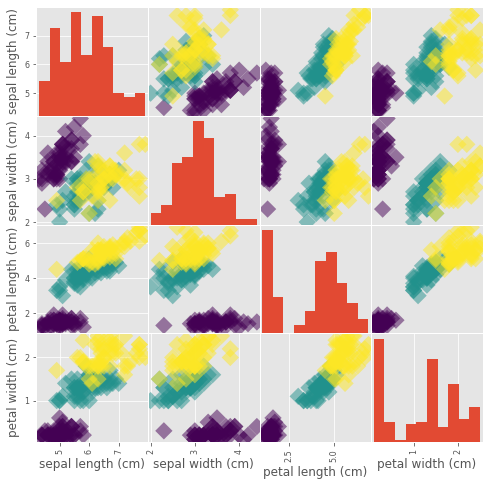

In [58]:
_ = pd.plotting.scatter_matrix(df, c = y, figsize = [8, 8], s=150, marker = 'D')

## The classification challenge

### k-Nearest Neighbors

- Basic idea: Predict the label of a data point by
    - Looking at the ‘k’ closest labeled data points
    - Taking a majority vote

### Scikit-learn fit and predict

- All machine learning models implemented as Python classes
    - They implement the algorithms for learning and predicting
    - Store the information learned from the data
    
- Training a model on the data = ‘ tting’ a model to the data
    - `.fit()` method
    - To predict the labels of new data: `.predict()` method

### Using scikit-learn to fit a classifier

In [59]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=6) 
knn.fit(iris['data'], iris['target'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [60]:
iris['data'].shape

(150, 4)

In [61]:
iris['target'].shape # targets needs to be a single column with the same # of observation as the feature data

(150,)

### Predicting on unlabeled data`

In [62]:
X_new = np.array(
[
    [5.6, 2.8, 3.9, 1.1],
    [5.7, 3.2, 3.8, 1.3],
    [4.7, 3.2, 1.3, 0.2]
])   # feature in columns and observation in rows
prediction = knn.predict(X_new) 
X_new.shape # 3 obsevation and 4 colums

(3, 4)

In [63]:
print('Prediction: {}'.format(prediction))

Prediction: [1 1 0]


## Measuring model performance


### Measuring model performance

- In classification, accuracy is a commonly used metric
- Accuracy = Fraction of correct predictions
- Which data should be used to compute accuracy?
- How well will the model perform on new data?


- Could compute accuracy on data used to fit classifier
- NOT indicative of ability to generalize
- Split data into **training** and **test** set
- Fit/train the classifier on the training set
- Make predictions on test set
- Compare predictions with the known labels

### Train/test split

In [64]:
from sklearn.model_selection import train_test_split

# use train_test_split function to randomly split data
# firast argument is feature data, the second the targets or labels
# returns the training data, test data, training labels, test labels
# by default split the data into 75% training data and 25% test data, we specify the size using the test_size 
# stratify=y:perform the split so that the split reflects the labels on your data, that is the labels to be distributed in train and test sets as they are in original dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
    random_state=21, stratify=y) 
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Test set predictions:")
print(y_pred)

Test set predictions:
[2 1 2 2 1 0 1 0 0 1 0 2 0 2 2 0 0 0 1 0 2 2 2 0 1 1 1 0 0 1 2 2 0 0 1 2 2
 1 1 2 1 1 0 2 1]


In [65]:
# check out accuracy of the model
knn.score(X_test, y_test)

0.9555555555555556

### Model complexity

- Larger k = smoother decision boundary = less complex model
- Smaller k = more complex model = can lead to overfitting

### Exercise: The digits recognition dataset

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping 

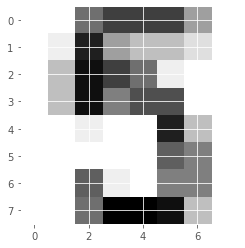

In [71]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Display the 1011th image
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

Train/Test Split + Fit/Predict/Accuracy

In [72]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.9833333333333333


Overfitting and underfitting

In this exercise, you will compute and plot the training and testing accuracy scores for a variety of different neighbor values. By observing how the accuracy scores differ for the training and testing sets with different values of k, you will develop your intuition for overfitting and underfitting.

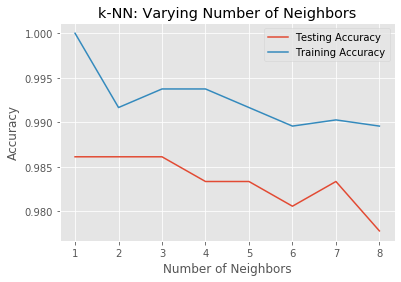

In [73]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

# It looks like the test accuracy is highest when using 3 and 5 neighbors. 
# Using 8 neighbors or more seems to result in a simple model that underfits the data. 

# Regression

## Introduction to regression

### Boston housing data

In [21]:
from sklearn import datasets
boston_data = datasets.load_boston()

# change to dataframe 
boston = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
boston['MEDV'] = pd.Series(boston_data.target)
print(boston.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


### Creating feature and target arrays

In [22]:
X = boston.drop('MEDV', axis=1).values
y = boston['MEDV'].values

### Predicting house value from a single feature

In [23]:
# single feature: the average num of romms in a block
X_rooms = X[:,5] # fifth column
# check type
type(X_rooms), type(y)

(numpy.ndarray, numpy.ndarray)

In [24]:
# Keep the first dimension, but add another dimension of size one to X,from (506,) to (506, 1)
y = y.reshape(-1, 1)
X_rooms = X_rooms.reshape(-1, 1) 
X_rooms.shape 

(506, 1)

### Plotting house value vs. number of rooms

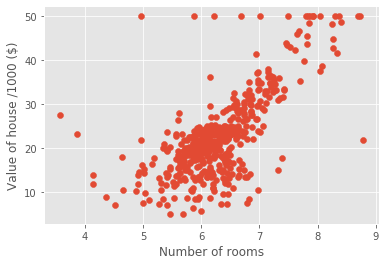

In [25]:
plt.scatter(X_rooms, y) 
plt.ylabel('Value of house /1000 ($)') 
plt.xlabel('Number of rooms') 
plt.show();

# more rooms leads to higher prices

### Fitting a regression model

In [26]:
import numpy as np
from sklearn.linear_model import LinearRegression

# instantiate LinearRegression as reg
reg = LinearRegression()
# fit regressor to the data
reg.fit(X_rooms, y)
# check out the regressors predictions over the range of the data by using np.linspace between the maximum
# and minimum number of rooms and make prediction for this data
prediction_space = np.linspace(min(X_rooms),
    max(X_rooms)).reshape(-1, 1)

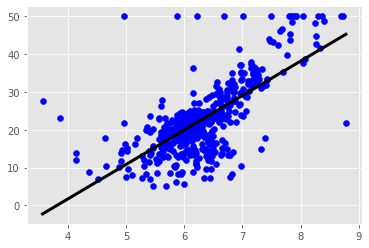

In [27]:
plt.scatter(X_rooms, y, color='blue') 
plt.plot(prediction_space, reg.predict(prediction_space),
    color='black', linewidth=3)
plt.show()

## The basics of linear regression

### Regression mechanics

- y = ax + b
- x = single feature
- a, b = parameters of model

- How do we choose a and b?
- Define an **error functions** for any given line
    - Choose the line that minimizes the error function

### The loss function

Ordinary least squares(OLS): Minimize sum of squares of residuals

### Linear regression in higher dimensions

$y = a_1x_1 +a_2x_2 + b$

- To fit a linear regression model here:
    - Need to specify 3 variables
    
- In higher dimensions:
    - Must specify coefficient for each feature and the variable b   
       $y = a_1x_1 +a_2x_2 + a_3x_3+ \dots +a_nx_n +b$
       
- Scikit-learn API works exactly the same way: 
    - Pass two arrays: Features, and target

### Linear regression on all features

In [28]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train) 
y_pred = reg_all.predict(X_test)
reg_all.score(X_test, y_test)

0.711226005748496

## Cross-validation
Cross-validation is a vital step in evaluating a model. It maximizes the amount of data that is used to train the model, as during the course of training, the model is not only trained, but also tested on all of the available data.

### Cross-validation motivation

- Model performance is dependent on way the data is split
- Not representative of the model’s ability to generalize
- Solution: Cross-validation!

### Cross-validation and model performance
- Cross-validation and model performance
- 10 folds = 10-fold CV
- k folds = k-fold CV
- More folds = More computationally expensive

### Cross-validation in scikit-learn

In [29]:
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import LinearRegression

# instantiate model
reg = LinearRegression()
# call cross val score with the regressor, the feature data and the target data as the first three positional argument 
# specify the numver of fold with cv
cv_results = cross_val_score(reg, X, y, cv=5) 
# the length of the array is the number of folds utilized
# note that the score reported is R square(default score for linear regression)
print(cv_results)

[ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]


In [30]:
np.mean(cv_results)

0.3532759243958772

## Regularized regression

[Linear least squares, Lasso,ridge regression有何本质区别?](https://www.zhihu.com/question/38121173)

Why regularize?
- Recall: Linear regression minimizes a loss function
- It chooses a coefficient for each feature variable
- Large coefficients can lead to overfitting
- Penalizing large coefficients: Regularization

### Ridge regression

- Loss function = OLS loss function + $\alpha * \sum_{i=1}^n \alpha_i^2$
- Alpha: Parameter we need to choose
- Picking alpha here is similar to picking k in k-NN
- Hyperparameter tuning (More in Chapter 3)
- Alpha controls model complexity
    - Alpha = 0: We get back OLS (Can lead to overfitting)
    - Very high alpha: Can lead to underfitting

In [37]:
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
# set up alpha, normalize insure all the variables are on the same scale 
ridge = Ridge(alpha=0.1, normalize=True) 
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge.score(X_test, y_test)

0.6996938275127313

### Lasso regression

- Loss function = OLS loss function + $\alpha * \sum_{i=1}^n |\alpha_i|$

In [33]:
from sklearn.linear_model import Lasso

X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size = 0.3, random_state=42)
lasso = Lasso(alpha=0.1, normalize=True) 
# Fit the regressor to the data
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test) 
lasso.score(X_test, y_test)

0.5950229535328551

### Lasso regression for feature selection

- Can be used to **select important features** of a dataset
- Shrinks the coefficients of less important features to exactly 0

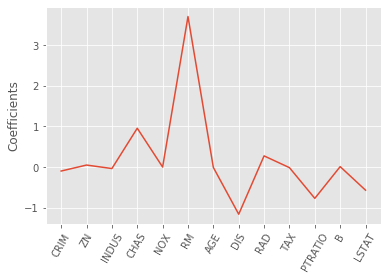

In [38]:
from sklearn.linear_model import Lasso 
names = boston.drop('MEDV', axis=1).columns 
lasso = Lasso(alpha=0.1)
# Compute and print the coefficients,extract the coef attribute and store in lasso coef
lasso_coef = lasso.fit(X, y).coef_
# plotting the coefficients as a function of feature name
_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation=60) 
_ = plt.ylabel('Coefficients')
plt.show()
# Lasso selected out the 'RM' feature as being the most important for predicting 
# Boston house prices, while shrinking the coefficients of certain other features to 0.

# Fine-tuning your model


## How good is your model?

### Classification metrics

- Measuring model performance with accuracy:
    - Fraction of correctly classified samples
    - Not always a useful metric
    
### Class imbalance example: Emails

- Spam classification
    - 99% of emails are real; 1% of emails are spam
- Could build a classifier that predicts ALL emails as real
    - 99% accurate!
    - But horrible at actually classifying spam
    - Fails at its original purpose
- Need more nuanced metrics

### Diagnosing classification predictions

- Confusion matrix   

|                    | Predicted: Spam Email | Predicted: Real Email |
|--------------------|-----------------------|-----------------------|
| Actual: Spam Email | True Positive         | False Negative        |
| Actual: Real Email | False Positive        | True Negative         |

### Metrics from the confusion matrix

- Accuracy:$\frac{tp+tn}{tp+tn+fp+fn}$

- Precision:$\frac{tp}{tp+fp}$

- Recall: $\frac{tp}{tp+fn}$

- F1score: $2* \frac{Precision* Recall}{Precisio+Recall}$

- High precision: Not many real emails predicted as spam

- High recall: Predicted most spam emails correctly

In [80]:
iris = datasets.load_iris() 
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names) 

# Import necessary modules
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors=8)
# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.4, random_state=42)
# Fit the classifier to the training data
knn.fit(X_train, y_train)
# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

In [81]:
# compute confusion matrix
print(confusion_matrix(y_test, y_pred))

[[23  0  0]
 [ 0 19  0]
 [ 0  1 17]]


In [82]:
# compute result matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.95      1.00      0.97        19
           2       1.00      0.94      0.97        18

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



## Logistic regression and the ROC curve

### Logistic regression for binary classification

- Logistic regression outputs probabilities
- If the probability ‘p’ is greater than 0.5:
    - The data is labeled ‘1’
- If the probability ‘p’ is less than 0.5:
    - The data is labeled ‘0’

In [5]:
voting = pd.read_csv("data/voting.csv")

# X = voting.drop('MEDV', axis=1).values
# y = voting['MEDV'].values
# # change to dataframe 
# boston = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
# boston['MEDV'] = pd.Series(boston_data.target)
# print(boston.head())

In [6]:
voting.head()

,republican,n,y,n.1,y.1,y.2,y.3,n.2,n.3,n.4,y.4,?,y.5,y.6,y.7,n.5,y.8
0,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
1,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
2,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
3,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
4,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y


In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split

logreg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.4, random_state=42)
logreg.fit(X_train, y_train) 
y_pred = logreg.predict(X_test)

### Probability thresholds

- By default, logistic regression threshold = 0.5
- Not specific to logistic regression
    - k-NN classifiers also have thresholds
- What happens if we vary the threshold?

### Plotting the ROC curve

In [84]:
from sklearn.metrics import roc_curve
y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Logistic Regression ROC Curve') 
plt.show();

ValueError: multiclass format is not supported

In [51]:
logreg.predict_proba(X_test)[:,1]

array([0.65194749, 0.113753  , 0.42367192, 0.53326284, 0.73298698,
       0.14147127, 0.65201256, 0.29554715, 0.59099377, 0.74828   ,
       0.3031024 , 0.2131148 , 0.14223618, 0.20556122, 0.08240537,
       0.50131659, 0.2690309 , 0.74639479, 0.54201771, 0.29234538,
       0.16852521, 0.34036832, 0.12709588, 0.31003144, 0.36053811,
       0.27159334, 0.42747646, 0.24370935, 0.18755633, 0.19399772,
       0.07861747, 0.0421944 , 0.78838368, 0.1381607 , 0.13525527,
       0.39862097, 0.64751995, 0.13663335, 0.10791494, 0.0689404 ,
       0.30268103, 0.43756082, 0.69470825, 0.0689789 , 0.11568716,
       0.78554939, 0.48276015, 0.32771509, 0.77330241, 0.17790818,
       0.61434026, 0.39057932, 0.40394824, 0.12695215, 0.43250567,
       0.7847528 , 0.14814448, 0.10828939, 0.08921448, 0.717639  ])